In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, add
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

funkcje do modelu 1 i 2

In [ ]:
def draw_curves(history, key1='accuracy', ylim1=(0.8, 1.00), 
                key2='loss', ylim2=(0.0, 1.0)):
    plt.figure(figsize=(12,4))
     
    plt.subplot(1, 2, 1)
    plt.plot(history.history[key1], "r--")
    plt.plot(history.history['val_' + key1], "g--")
    plt.ylabel(key1)
    plt.xlabel('Epoch')
    plt.ylim(ylim1)
    plt.legend(['train', 'test'], loc='best')
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history[key2], "r--")
    plt.plot(history.history['val_' + key2], "g--")
    plt.ylabel(key2)
    plt.xlabel('Epoch')
    plt.ylim(ylim2)
    plt.legend(['train', 'test'], loc='best')
     
    plt.show()


In [ ]:
def plot_value_img(i, predictions, true_label, img):
    predictions, true_label, img = predictions[i], true_label[i], img[i]    
    predicted_label = np.argmax(predictions)
    true_value = np.argmax(true_label)   
     
    plt.figure(figsize=(12,5))
     
    plt.subplot(1, 2, 1)
     
    plt.yticks(np.arange(len(class_names)), class_names)
    thisplot = plt.barh(range(10), predictions, color="gray")      
    thisplot[predicted_label].set_color('r')
    thisplot[true_value].set_color('g')
 
    plt.subplot(1, 2, 2) 
     
    plt.imshow(img, cmap=plt.cm.binary)
    if predicted_label == true_value:
        color = 'green'
    else:
        color = 'red'
 
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions),
                                class_names[true_value]),
                                color=color)    
    plt.show()

model 1 i 2


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_labels_old = train_labels
print(f'Zbiór uczący: {train_images.shape}, zbiór walidacyjny: {test_images.shape}')

Zbiór uczący: (60000, 28, 28), zbiór walidacyjny: (10000, 28, 28)


In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

Zbiór uczący: (60000, 28, 28), zbiór walidacyjny: (10000, 28, 28)


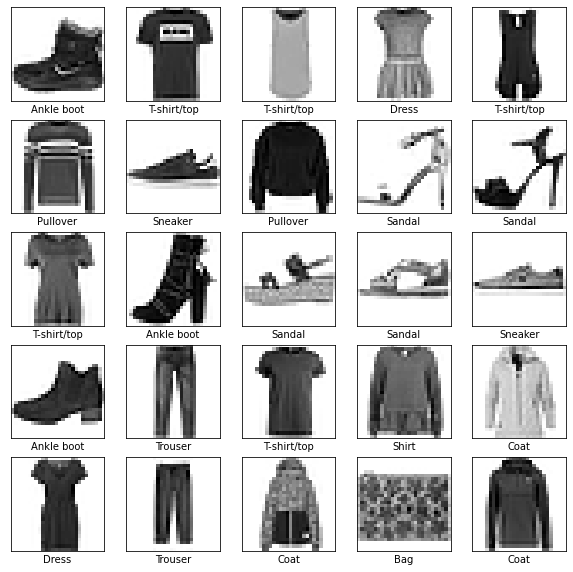

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels_old[i]])
plt.show()

In [ ]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation = 'softmax'))

In [ ]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model1.fit(train_images, train_labels, epochs=10)

In [ ]:
fitted1 = model.fit(train_images, 
                    train_labels, 
                    epochs=10,
                    verbose=1,
                    batch_size = 256,
                    validation_data = (test_images, test_labels)
                   )

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 1.0688 - accuracy: 0.8598 - val_loss: 1.4188 - val_accuracy: 0.8038
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 1.0465 - accuracy: 0.8630 - val_loss: 1.4235 - val_accuracy: 0.8038
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 1.0420 - accuracy: 0.8620 - val_loss: 1.4333 - val_accuracy: 0.8015
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 1.0391 - accuracy: 0.8627 - val_loss: 1.4441 - val_accuracy: 0.8106
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 1.0374 - accuracy: 0.8627 - val_loss: 1.4579 - val_accuracy: 0.8090
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 1.0347 - accuracy: 0.8651 - val_loss: 1.4639 - val_accuracy: 0.8042
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 1.0348 - accuracy: 0.8683 - val_loss: 1.4601 - val_accuracy: 0.8066

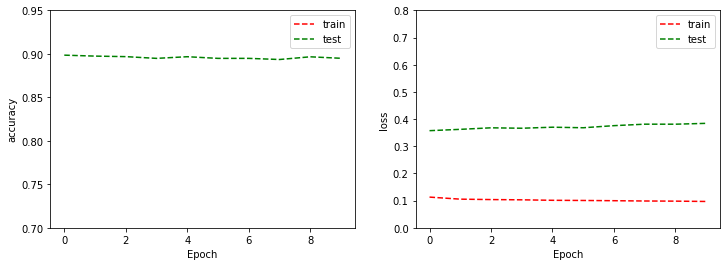

In [ ]:
draw_curves(fitted1, key1='accuracy', ylim1=(0.7, 0.95), 
            key2='loss', ylim2=(0.0, 0.8))

In [ ]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation = 'softmax'))
 
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


fitted2 = model2.fit(train_images, 
                    train_labels, 
                    epochs=10,
                    verbose=1,
                    batch_size = 256,
                    validation_data = (test_images, test_labels)
                   )
 

Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 1.2537 - accuracy: 0.5729 - val_loss: 0.6455 - val_accuracy: 0.7763
Epoch 2/10
235/235 [==============================] - 1s 2ms/step - loss: 0.5886 - accuracy: 0.8060 - val_loss: 0.5611 - val_accuracy: 0.8111
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.5172 - accuracy: 0.8283 - val_loss: 0.5249 - val_accuracy: 0.8182
Epoch 4/10
235/235 [==============================] - 1s 2ms/step - loss: 0.4868 - accuracy: 0.8353 - val_loss: 0.5038 - val_accuracy: 0.8256
Epoch 5/10
235/235 [==============================] - 1s 2ms/step - loss: 0.4680 - accuracy: 0.8433 - val_loss: 0.4879 - val_accuracy: 0.8334
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.4517 - accuracy: 0.8491 - val_loss: 0.4814 - val_accuracy: 0.8344
Epoch 7/10
235/235 [==============================] - 1s 2ms/step - loss: 0.4441 - accuracy: 0.8496 - val_loss: 0.4776 - val_accuracy: 0.8349
Epoch 

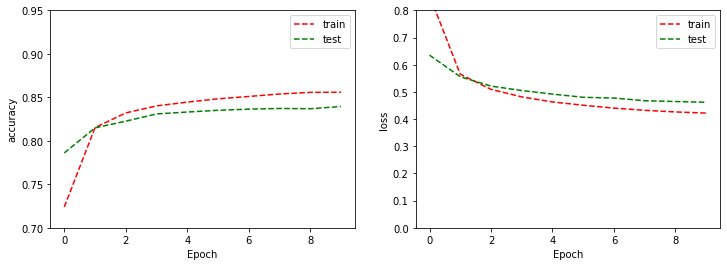

In [ ]:
draw_curves(fitted2, key1='accuracy', ylim1=(0.7, 0.95), 
            key2='loss', ylim2=(0.0, 0.8))

In [ ]:
probability_model2 = tf.keras.Sequential([model2, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

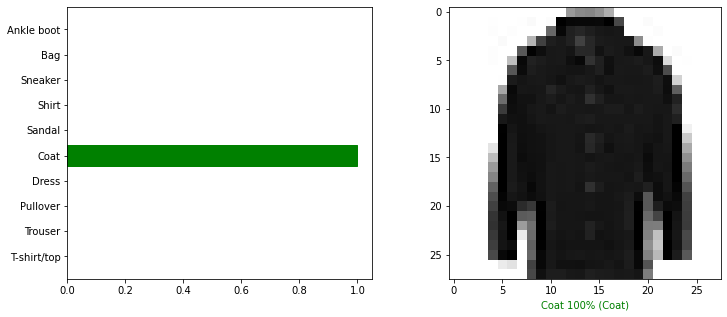

In [ ]:
plot_value_img(14, test_labels, test_labels, test_images)   

model 3


In [405]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0

test_images = test_images / 255.0

In [406]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

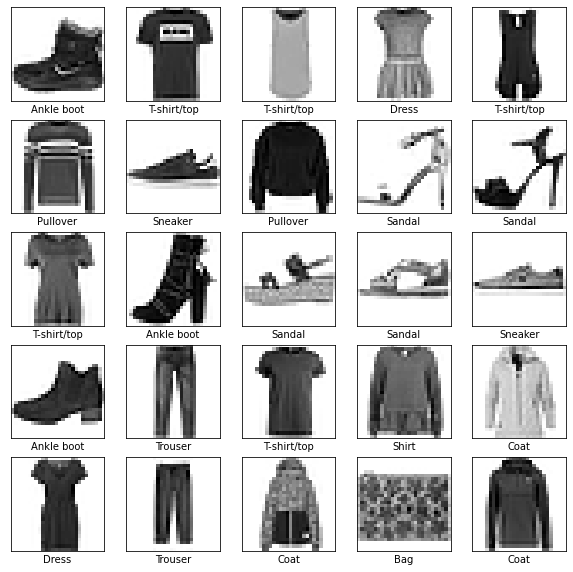

In [407]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [408]:
history = model3.fit(train_images, train_labels, epochs=10, validation_data = (test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6305 - accuracy: 0.7832 - val_loss: 0.4295 - val_accuracy: 0.8439
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3831 - accuracy: 0.8617 - val_loss: 0.3896 - val_accuracy: 0.8606
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3353 - accuracy: 0.8760 - val_loss: 0.3610 - val_accuracy: 0.8698
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3218 - accuracy: 0.8835 - val_loss: 0.3498 - val_accuracy: 0.8747
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.8896 - val_loss: 0.3726 - val_accuracy: 0.8641
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2771 - accuracy: 0.8971 - val_loss: 0.3656 - val_accuracy: 0.8643
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2654 - accuracy: 0.9019 - val_loss: 0.3363 - val_accuracy:

In [409]:
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3782 - accuracy: 0.8720

Test accuracy: 0.871999979019165


In [410]:
probability_model3 = tf.keras.Sequential([model3, 
                                         tf.keras.layers.Softmax()])

In [411]:
predictions = probability_model3.predict(test_images)

In [412]:
predictions[0]

array([2.3935690e-10, 1.7059498e-11, 3.2386978e-13, 2.0074285e-12,
       5.5610661e-10, 1.1325938e-05, 6.3208033e-12, 3.3636519e-04,
       6.5939859e-10, 9.9965227e-01], dtype=float32)

In [413]:
np.argmax(predictions[0])

9

In [414]:
test_labels[0]

9

funkcje do modelu 3

In [415]:
def pokaz_zdjecie(i, tablica_prawd, pop_opis, foto):
  pop_opis, foto = pop_opis[i], foto[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(foto, cmap=plt.cm.binary)

  opis = np.argmax(tablica_prawd)
  if opis == pop_opis:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[opis],
                                100*np.max(tablica_prawd),
                                class_names[pop_opis]),
                                color=color)

def pokaz_wykres(i, tablica_prawd, pop_opis):
  pop_opis = pop_opis[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), tablica_prawd, color="#777777")
  plt.ylim([0, 1])
  opis = np.argmax(pop_opis)

  thisplot[opis].set_color('red')
  thisplot[pop_opis].set_color('blue')

def pokaz_wykres_2(tablica_prawd):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), tablica_prawd, color="#777777")
  plt.ylim([0, 1])
  opis = np.argmax(tablica_prawd)


def pokaz_uczenie(history, key1='accuracy', ylim1=(0.8, 1.00), 
                key2='loss', ylim2=(0.0, 1.0)):
    plt.figure(figsize=(12,4))
     
    plt.subplot(1, 2, 1)
    plt.plot(history.history[key1], "r--")
    plt.plot(history.history['val_' + key1], "g--")
    plt.ylabel(key1)
    plt.xlabel('Epoch')
    plt.ylim(ylim1)
    plt.legend(['treningowy', 'testowy'], loc='best')
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history[key2], "r--")
    plt.plot(history.history['val_' + key2], "g--")
    plt.ylabel(key2)
    plt.xlabel('Epoch')
    plt.ylim(ylim2)
    plt.legend(['treningowy', 'testowy'], loc='best')
     
    plt.show()


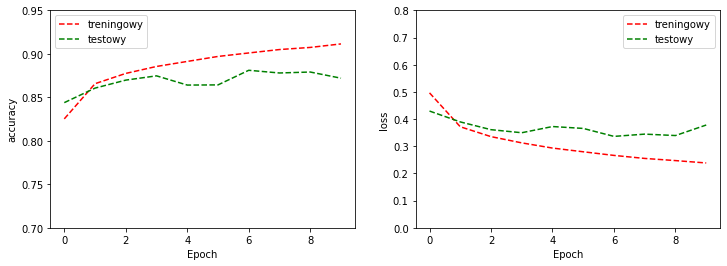

In [416]:
pokaz_uczenie(history, key1='accuracy', ylim1=(0.7, 0.95), 
            key2='loss', ylim2=(0.0, 0.8))

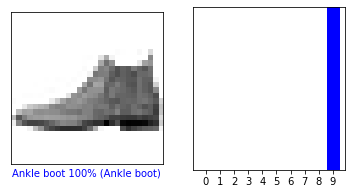

In [417]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
pokaz_zdjecie(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
pokaz_wykres(i, predictions[i],  test_labels)
plt.show()

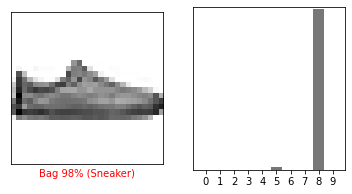

In [418]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
pokaz_zdjecie(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
pokaz_wykres(i, predictions[i],  test_labels)
plt.show()

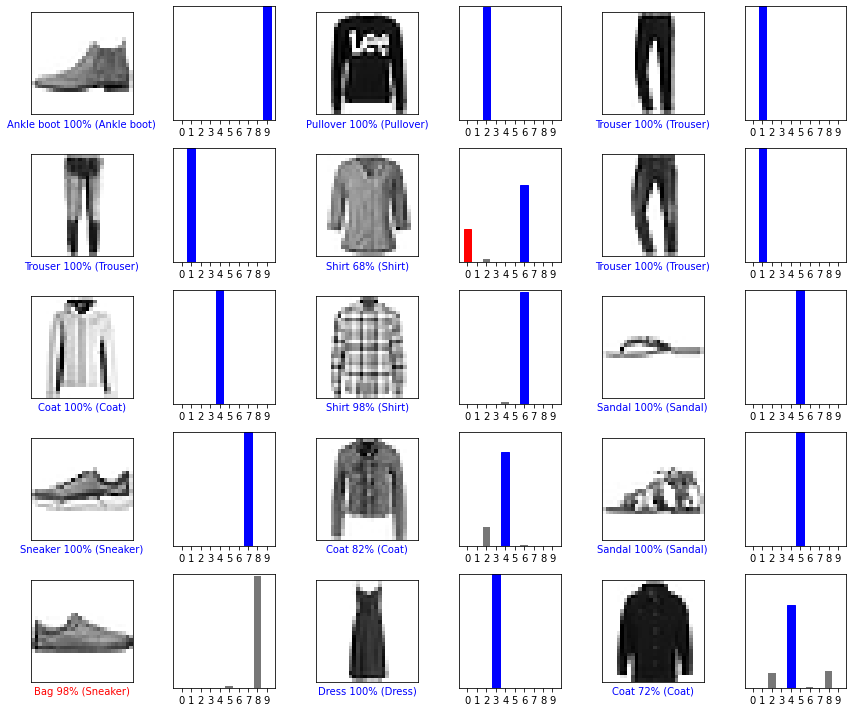

In [419]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  pokaz_zdjecie(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  pokaz_wykres(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[1.1029159e-04 1.5567123e-12 9.9780613e-01 5.0180560e-10 1.0466611e-03
  4.2035961e-16 1.0366471e-03 7.9140828e-13 2.5139309e-07 3.7308930e-15]]


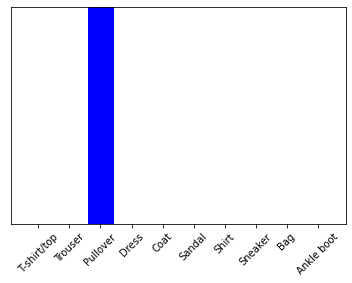

In [420]:
img = test_images[1]

print(img.shape)

img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model3.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [421]:
np.argmax(predictions_single[0])

2

własne zdjecie

In [422]:
from google.colab import files
import matplotlib.image as mpimg
from skimage.color import rgb2gray
import cv2
from numpy import asarray

In [432]:
uploaded = files.upload()
filename = next(iter(uploaded))
print(filename)

Saving test4.jpg to test4.jpg
test4.jpg


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.7176471  0.7254902  0.745098
  0.77254903 0.93333334 0.87058824 0.8666667  0.75686276 0.73725486
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.78039217 0.78431374 0.76862746
  0.8        0.8901961  0.8392157  0.81960785 0.78039217 0.8
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.7764706  0.78431374

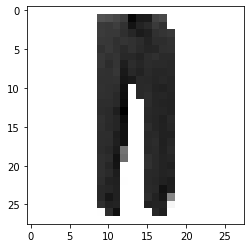

In [433]:
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_res = cv2.resize(gray, (28, 28)) 
foto = asarray(gray_res)
foto = 1 - foto.astype("float32") / 255.0
print(foto)
plt.imshow(gray_res, cmap="Greys_r")
redy2use = (np.expand_dims(foto,0))

tablica nazw klas 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

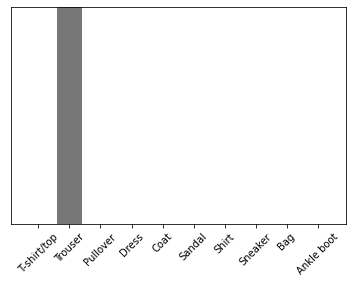

In [434]:
predictions_single2 = probability_model3.predict(redy2use)

#print(predictions_single2)

plot_value_array2(predictions_single2[0])
_ = plt.xticks(range(10), class_names, rotation=45)